In [187]:
import pandas as pd

In [188]:
df_2011 = pd.read_csv("C:/Users/96659/Desktop/Cleaning -EDA/2011_data.csv")
df_2012 = pd.read_csv("C:/Users/96659/Desktop/Cleaning -EDA/2012_data.csv")
final_df = pd.read_csv("C:/Users/96659/Desktop/Cleaning -EDA/clean_bike_data.csv")

In [189]:
df_2012.head()

,Unnamed: 0,Day,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Precipitation
0,0,2012-01-01,50.3,38.4,66.0,9.3,29.9,NaN
1,1,2012-01-02,39.4,16.3,39.5,13.8,29.9,0.0
2,2,2012-01-03,28.8,8.0,42.6,16.2,30.1,0.0
3,3,2012-01-04,27.1,7.2,43.2,7.7,30.2,0.0
4,4,2012-01-05,39.8,23.7,54.6,4.8,30.0,0.0


In [190]:
df = pd.concat([df_2011, df_2012], join='inner' )
df
#sort=False

,Day,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Precipitation
0,2011-01-01,41.8,27.4,57.3,6.2,30.0,NaN
1,2011-01-02,36.0,18.3,49.1,9.0,30.1,0.0
2,2011-01-03,32.9,16.4,50.9,6.5,30.2,0.0
3,2011-01-04,37.5,19.0,49.1,7.5,30.2,0.0
4,2011-01-05,39.4,21.1,48.7,5.7,30.3,0.0
...,...,...,...,...,...,...,...
361,2012-12-27,38.5,27.9,69.5,14.7,29.7,0.0
362,2012-12-28,38.7,25.5,59.5,6.5,30.1,0.0
363,2012-12-29,37.5,23.0,81.3,4.3,29.8,0.0
364,2012-12-30,38.2,19.5,47.4,15.0,30.1,0.0


In [191]:
#df > day
#df_bike > dteday

In [193]:
final_df = final_df.drop('Unnamed: 0', 1)

In [194]:
final_df.rename(columns={'date':'Day'}, inplace=True)

In [115]:
final_df = pd.merge(df, df_bike, how='inner', on = 'Day')

In [116]:
final_df = final_df.drop('Precipitation', 1)

## EDA 

In [195]:
final_df.head()

,Day,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0


In [196]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Day                                       731 non-null    object 
 1   temperature                               731 non-null    float64
 2   dew_point                                 731 non-null    float64
 3   humidity                                  731 non-null    float64
 4   wind_speed                                731 non-null    float64
 5   pressure                                  731 non-null    float64
 6   season                                    731 non-null    int64  
 7   year                                      731 non-null    int64  
 8   month                                     731 non-null    int64  
 9   weekday                                   731 non-null    int64  
 10  casual                                

In [197]:
final_df.describe()

,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,casual,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,60.254309,46.058960,63.875650,8.136252,30.003694,2.496580,2011.500684,6.519836,2.997264,848.176471,...,16452.775650,4504.348837,23238.187415,0.028728,0.971272,0.316005,0.683995,0.633379,0.028728,0.337893
std,16.483375,17.865092,14.580645,3.324943,0.221081,1.110807,0.500342,3.451913,2.004787,686.622488,...,7021.153697,1937.211452,10486.142687,0.167155,0.167155,0.465233,0.465233,0.482212,0.167155,0.473316
min,21.100000,0.400000,19.300000,1.000000,29.000000,1.000000,2011.000000,1.000000,0.000000,2.000000,...,90.000000,22.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.200000,29.200000,52.850000,5.850000,29.900000,2.000000,2011.000000,4.000000,1.000000,315.500000,...,11236.500000,3152.000000,15718.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.600000,48.100000,63.200000,7.700000,30.000000,3.000000,2012.000000,7.000000,3.000000,713.000000,...,16479.000000,4548.000000,23520.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,74.650000,62.350000,74.400000,9.800000,30.100000,3.000000,2012.000000,10.000000,5.000000,1096.000000,...,21494.250000,5956.000000,30985.750000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,93.200000,77.200000,98.800000,25.100000,30.600000,4.000000,2012.000000,12.000000,6.000000,3410.000000,...,31257.000000,8714.000000,50273.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
final_df.shape

(731, 23)

In [199]:
final_df.dtypes

Day                                          object
temperature                                 float64
dew_point                                   float64
humidity                                    float64
wind_speed                                  float64
pressure                                    float64
season                                        int64
year                                          int64
month                                         int64
weekday                                       int64
casual                                        int64
casual_revenue                                int64
registered                                    int64
registered_revenue                          float64
bikes_count                                   int64
total_revenue                               float64
holiday_holiday                               int64
holiday_not a holiday                         int64
working_day_weekend                           int64
working_day_

In [200]:
final_df.columns

Index(['Day', 'temperature', 'dew_point', 'humidity', 'wind_speed', 'pressure',
       'season', 'year', 'month', 'weekday', 'casual', 'casual_revenue',
       'registered', 'registered_revenue', 'bikes_count', 'total_revenue',
       'holiday_holiday', 'holiday_not a holiday', 'working_day_weekend',
       'working_day_working day', 'weather_condition_Clear_Partly cloudy',
       'weather_condition_Light Snow, Light Rain',
       'weather_condition_Mist_Cloudy'],
      dtype='object')

In [201]:
final_df.head()

,Day,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0


In [202]:
final_df.columns=[column.strip()for column in final_df.columns]

In [203]:
final_df = final_df.drop(["Precipitation"], axis=1, errors="ignore")
final_df.head()

,Day,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0


In [204]:
final_df.rename(columns={'Day':'date', 'Temperature': 'temperature', 'Dew Point':'dew_point', 'Humidity':'humidity', 'Wind Speed':'wind_speed', 'Pressure':'pressure','workingday':'working_day', 'weathersit':'weather_condition','cnt':'count', 'yr':'year', 'mnth':'month'}, inplace=True)
final_df.head()

,date,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0


In [205]:
final_df.isna().sum()

date                                        0
temperature                                 0
dew_point                                   0
humidity                                    0
wind_speed                                  0
pressure                                    0
season                                      0
year                                        0
month                                       0
weekday                                     0
casual                                      0
casual_revenue                              0
registered                                  0
registered_revenue                          0
bikes_count                                 0
total_revenue                               0
holiday_holiday                             0
holiday_not a holiday                       0
working_day_weekend                         0
working_day_working day                     0
weather_condition_Clear_Partly cloudy       0
weather_condition_Light Snow, Ligh

In [206]:
final_df.dtypes

date                                         object
temperature                                 float64
dew_point                                   float64
humidity                                    float64
wind_speed                                  float64
pressure                                    float64
season                                        int64
year                                          int64
month                                         int64
weekday                                       int64
casual                                        int64
casual_revenue                                int64
registered                                    int64
registered_revenue                          float64
bikes_count                                   int64
total_revenue                               float64
holiday_holiday                               int64
holiday_not a holiday                         int64
working_day_weekend                           int64
working_day_

In [207]:
#final_df["Day"] = pd.to_datetime(final_df.date)

In [208]:
len(final_df.date.unique())

731

In [209]:
final_df.head()

,date,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0


In [210]:
#final_df.reset_index()

In [211]:
final_df

,date,temperature,dew_point,humidity,wind_speed,pressure,season,year,month,weekday,...,registered_revenue,bikes_count,total_revenue,holiday_holiday,holiday_not a holiday,working_day_weekend,working_day_working day,weather_condition_Clear_Partly cloudy,"weather_condition_Light Snow, Light Rain",weather_condition_Mist_Cloudy
0,2011-01-01,48.4,42.2,82.8,8.0,30.1,1,2011,1,6,...,2943.0,985,5591.0,0,1,1,0,0,0,1
1,2011-01-02,50.4,40.8,73.8,11.0,30.0,1,2011,1,0,...,3015.0,801,4063.0,0,1,1,0,0,0,1
2,2011-01-03,33.6,13.2,44.2,10.8,30.2,1,2011,1,1,...,5530.5,1349,6490.5,0,1,0,1,1,0,0
3,2011-01-04,33.7,20.8,60.0,6.7,30.0,1,2011,1,2,...,6543.0,1562,7407.0,0,1,0,1,1,0,0
4,2011-01-05,36.6,15.7,43.6,8.4,29.9,1,2011,1,3,...,6831.0,1600,7487.0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,38.5,27.9,69.5,14.7,29.7,1,2012,12,4,...,8401.5,2114,10377.5,0,1,0,1,0,0,1
727,2012-12-28,38.7,25.5,59.5,6.5,30.1,1,2012,12,5,...,11029.5,3095,16181.5,0,1,0,1,0,0,1
728,2012-12-29,37.5,23.0,81.3,4.3,29.8,1,2012,12,6,...,5319.0,1341,6591.0,0,1,1,0,0,0,1
729,2012-12-30,38.2,19.5,47.4,15.0,30.1,1,2012,12,0,...,6444.0,1796,9356.0,0,1,1,0,1,0,0


##  Visualization

In [212]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

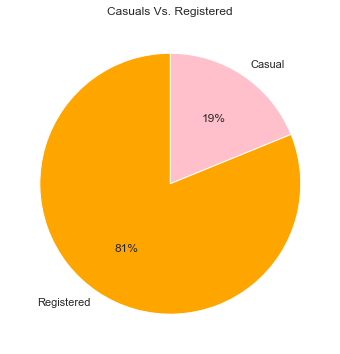

In [238]:
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = 6,6
sorted_casuals = final_df['casual'].sum()
sorted_registered = final_df['registered'].sum()
names='Casual', 'Registered'
values=[sorted_casuals,sorted_registered]
mycolors = ["pink", "Orange"]

#plt.pie(y, labels = mylabels, colors = mycolors)

plt.pie(values, labels=names, startangle = 90, counterclock = False, autopct='%.0f%%', colors = mycolors);
plt.title('Casuals Vs. Registered');
plt.show();




In [214]:
#final_df = pd.get_dummies(final_df) #can just apply it to the whole df
#final_df.head(3)

In [215]:
#final_df.rename(columns={'count':'bikes_count'}, inplace=True)

In [216]:
bike_counts = final_df.groupby(['season']).total_revenue.sum()

In [217]:
bike_counts

season
1    2333243.0
2    4845977.5
3    5566399.0
4    4241495.5
Name: total_revenue, dtype: float64

<ipython-input-234-4903135fe548>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(bike_counts)


Text(0.5, 0, 'Season')

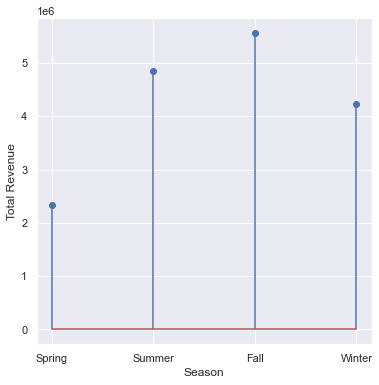

In [234]:
plt.stem(bike_counts)
positions = (0, 1, 2,3)
labels = ("Spring", "Summer", "Fall",'Winter')
plt.xticks(positions, labels)
plt.ylabel('Total Revenue')
plt.xlabel('Season')

In [219]:
bike_counts_per_day = final_df.groupby(['weekday']).total_revenue.sum()

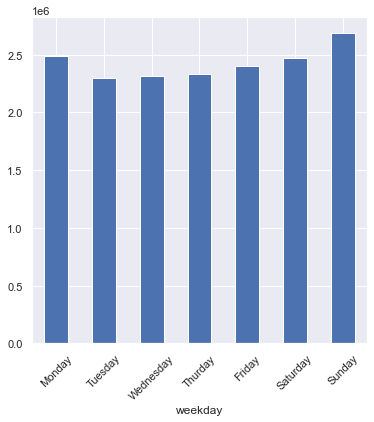

In [220]:
bike_counts_per_day.plot(kind="bar")
positions = (0, 1, 2,3,4,5,6)
labels = ("Monday", "Tuesday", "Wednesday","Thurday", "Friday", "Saturday", "Sunday")
plt.xticks(positions, labels,rotation=45);

In [221]:
x1 = final_df['temperature']
y1 = final_df['total_revenue']
x1.head()

0    48.4
1    50.4
2    33.6
3    33.7
4    36.6
Name: temperature, dtype: float64

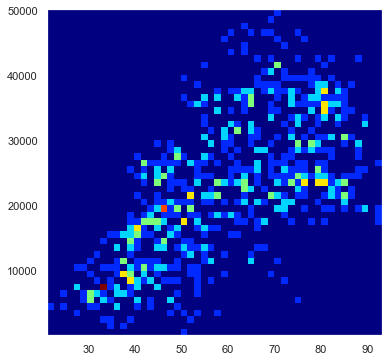

In [231]:
plt.hist2d(x1, y1, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

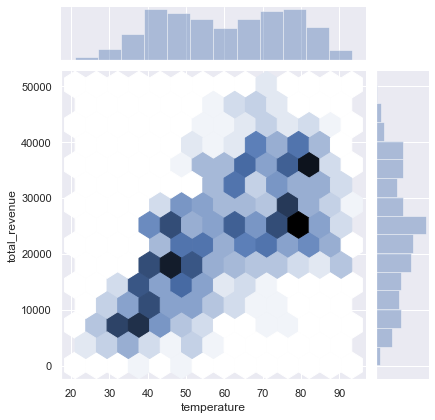

In [225]:
sns.jointplot(x=final_df["temperature"], y=final_df["total_revenue"], kind='hex')

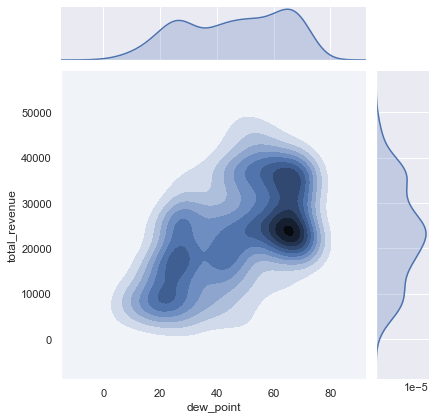

In [226]:
sns.jointplot(x=final_df["dew_point"], y=final_df["total_revenue"], kind='kde')

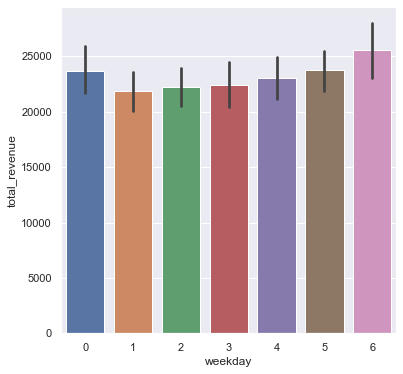

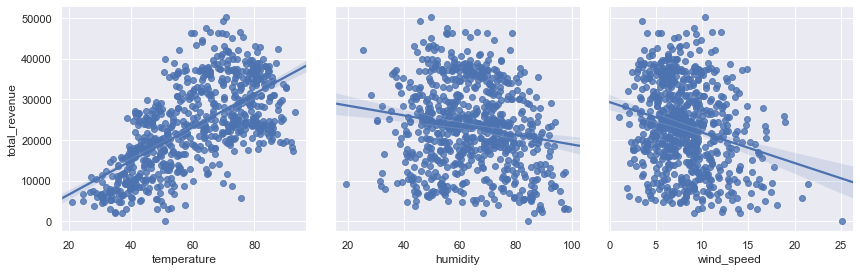

In [227]:
bp1 = sns.barplot(data=final_df, x='weekday', y='total_revenue')
pp = sns.pairplot(data=final_df,
y_vars=['total_revenue'],
x_vars=['temperature', 'humidity', 'wind_speed'],
kind='reg',
height=4)

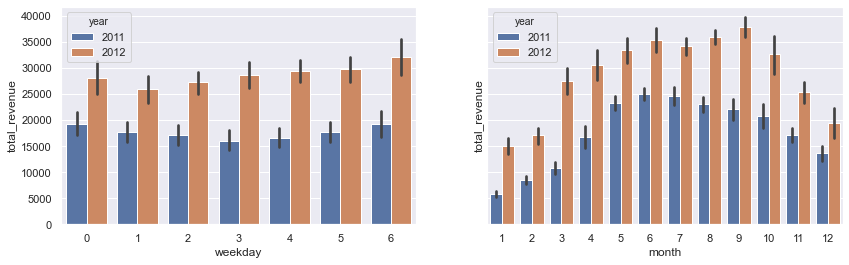

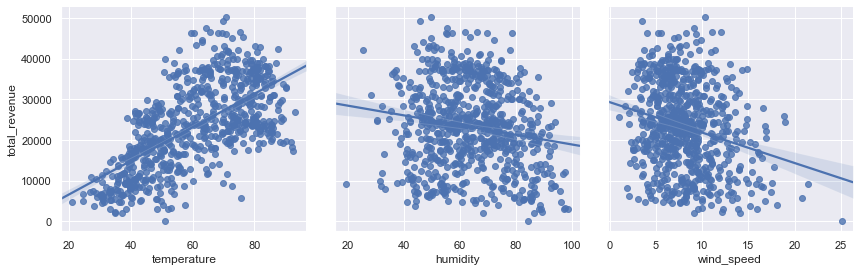

In [232]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=final_df, x='weekday', y='total_revenue', hue='year', ax=ax1)
bp2 = sns.barplot(data=final_df, x='month', y='total_revenue', hue='year', ax=ax2)
pp = sns.pairplot(data=final_df,
y_vars=['total_revenue'],
x_vars=['temperature', 'humidity', 'wind_speed'],
kind='reg',
height=4)

In [229]:
final_df.to_csv("clean_bike_data.csv")